# Loss Functions

## 1. L1 and L2 loss

*L1* and *L2* are two common loss functions in machine learning which are mainly used to minimize the error.

**L1 loss function** are also known as **Least Absolute Deviations** in short **LAD**.
**L2 loss function** are also known as **Least square errors** in short **LS**.

Let's get brief of these two

### L1 Loss function
It is used to minimize the error which is the sum of all the absolute differences in between the true value and the predicted value.

<img src=".\Images\img13.png">

### L2 Loss Function
It is also used to minimize the error which is the sum of all the squared differences in between the true value and the pedicted value.

<img src=".\Images\img15.png">

**The disadvantage** of the **L2 norm** is that when there are outliers, these points will account for the main component of the loss. For example, the true value is 1, the prediction is 10 times, the prediction value is 1000 once, and the prediction value of the other times is about 1, obviously the loss value is mainly dominated by 1000.

In [1]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

In [2]:
x_guess = tf.lin_space(-1., 1., 100)
x_actual = tf.constant(0,dtype=tf.float32)

In [3]:
l1_loss = tf.abs((x_guess-x_actual))
l2_loss = tf.square((x_guess-x_actual))

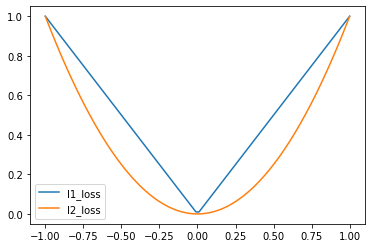

In [4]:
with tf.Session() as sess:
    x_,l1_,l2_ = sess.run([x_guess, l1_loss, l2_loss])
    plt.plot(x_,l1_,label='l1_loss')
    plt.plot(x_,l2_,label='l2_loss')
    plt.legend()
    plt.show()

## 2. Huber Loss 

Huber Loss is often used in regression problems. Compared with L2 loss, Huber Loss is less sensitive to outliers(because if the residual is too large, it is a piecewise function, loss is a linear function of the residual).

<img src=".\Images\img1.png">

Among them, $\delta$ is a set parameter, $y$ represents the real value, and $f(x)$ represents the predicted value.

The advantage of this is that when the residual is small, the loss function is L2 norm, and when the residual is large, it is a linear function of L1 norm

### Pseudo-Huber loss function 

A smooth approximation of Huber loss to ensure that each order is differentiable.

<img src=".\Images\img2.png">

Where $\delta$ is the set parameter, the larger the value, the steeper the linear part on both sides.

<img src=".\Images\img3.png">

## 3.Hinge Loss

Hinge loss is often used for binary classification problems, such as ground true: t = 1 or -1, predicted value y = wx + b

In the svm classifier, the definition of hinge loss is

<img src=".\Images\img4.png">

In other words, the closer the y is to t, the smaller the loss will be.

In [5]:
x_guess2 = tf.linspace(-3.,5.,500)
x_actual2 = tf.convert_to_tensor([1.]*500)

#Hinge loss
#hinge_loss = tf.losses.hinge_loss(labels=x_actual2, logits=x_guess2)
hinge_loss = tf.maximum(0.,1.-(x_guess2*x_actual2))
0with tf.Session() as sess:
    x_,hin_ = sess.run([x_guess2, hinge_loss])
    plt.plot(x_,hin_,'--', label='hin_')
    plt.legend()
    plt.show()

SyntaxError: invalid syntax (<ipython-input-5-2caf33f96afd>, line 7)

## 4.Cross-entropy loss

<img src=".\Images\img7.png">

The above is mainly to say that cross-entropy loss is mainly applied to binary classification problems. The predicted value is a probability value and the loss is defined according to the cross entropy. Note the value range of the above value: the predicted value of y should be a probability and the value range is [0,1]

<img src=".\Images\img8.png">

## 5.Sigmoid-Cross-entropy loss

The above cross-entropy loss requires that the predicted value is a probability. Generally, we calculate $scores = x*w + b$. Entering this value into the sigmoid function can compress the value range to (0,1).

<img src=".\Images\img9.png">

It can be seen that the sigmoid function smoothes the predicted value(such as directly inputting 0.1 and 0.01 and inputting 0.1, 0.01 sigmoid and then entering, the latter will obviously have a much smaller change value), which makes the predicted value of sigmoid-ce far from the label loss growth is not so steep.

## 6.Softmax cross-entropy loss

First, the softmax function can convert a set of fraction vectors into corresponding probability vectors. Here is the definition of softmax function

<img src=".\Images\img10.png">

As above, softmax also implements a vector of 'squashes' k-dimensional real value to the [0,1] range of k-dimensional, while ensuring that the cumulative sum is 1.

According to the definition of cross entropy, probability is required as input.Sigmoid-cross-entropy-loss uses sigmoid to convert the score vector into a probability vector, and softmax-cross-entropy-loss uses a softmax function to convert the score vector into a probability vector.

According to the definition of cross entropy loss.

<img src=".\Images\img11.png">

where $p(x)$ represents the probability that classification $x$ is a correct classification, and the value of $p$ can only be 0 or 1. This is the prior value

$q(x)$ is the prediction probability that the $x$ category is a correct classification, and the value range is (0,1)

So specific to a classification problem with a total of C types, then $p(x_j)$, $(0 <_{=} j <_{=} C)$ must be only 1 and C-1 is 0(because there can be only one correct classification, correct the probability of classification as correct classification is 1, and the probability of the remaining classification as correct classification is 0)

Then the definition of softmax-cross-entropy-loss can be derived naturally.

Here is the definition of softmax-cross-entropy-loss.

<img src=".\Images\img12.png">

Where $f_j$ is the score of all possible categories, and $f_{y_i}$ is the score of ground true class